## Domain: Banking

**Context:**

A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business  via  loan  interests.  A  campaign  that  the  bank  ran  in  last  quarter  showed  an  average  single  digit  conversion  rate.  Digital  transformation being  the  core  strength  of  the  business  strategy,  marketing  department  wants  to  devise  effective  campaigns  with  better  target  marketing  to increase the conversion ratio to double digit with same budget as per last campaign.

**DATA DICTIONARY:**
1.ID: Customer ID

2.Age: Customer’s approximate age.

3.CustomerSince: Customer of the bank since. [unit is masked]

4.HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]

5.ZipCode: Customer’s zip code.

6.HiddenScore: A score associated to the customer which is masked by the bank as an IP.

7.MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]

8.Level: A level associated to the customer which is masked by the bank as an IP.

9.Mortgage: Customer’s mortgage. [unit is masked]

10.Security: Customer’s security asset with the bank. [unit is masked]

11.FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]

12.InternetBanking: if the customer uses internet banking.

13.CreditCard: if the customer uses bank’s credit card.

14.LoanOnCard: if the customer has a loan on credit card.

**Project Objective:**

Build  a  Machine  Learning  model  to  perform  focused  marketing  by  predicting  the  potential  customers  who  will  convert using the historical dataset.

### 1.Data Understanding and Preparation:

In [1]:
# Importing Neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">A.Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [2]:
# Dataset 1

data1=pd.read_csv('Data1.csv')
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
# Dataset 2

data2=pd.read_csv('Data2.csv')
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">B.Print shape and Column Names and DataTypes of both the Dataframe. 

In [4]:
print("Dataset 1")
print("Shape of data is:", data1.shape)
print("Column names of the Datset: \n", data1.columns)
print("Data types of the data: \n", data1.dtypes)
print("-----------------------------------------------------------------------------------")
print("Dataset 2")
print("Shape of data is:", data2.shape)
print("Column names of the Datset: \n", data2.columns)
print("Data types of the data: \n", data2.dtypes)

Dataset 1
Shape of data is: (5000, 8)
Column names of the Datset: 
 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Data types of the data: 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
-----------------------------------------------------------------------------------
Dataset 2
Shape of data is: (5000, 7)
Column names of the Datset: 
 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
Data types of the data: 
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
Lo

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">C.Merge both the Dataframe on ‘ID’ feature to form a single DataFrame

In [5]:
data=data1.merge(data2, left_on='ID', right_on="ID")
data.shape

(5000, 14)

**Final DataFrame has 5000 rows and 14 column.**

In [6]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">D.Change Datatype of below features to ‘Object’

In [7]:
col=['CreditCard',  'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

for i in col:
    data[i]=data[i].astype('object')

In [8]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

**We can see the data types of the some of the features have been changed.**

### 2.Data Exploration and Analysis: 

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">A.Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

**LoanOnCard column have 20 missing values. As our data is consisted of 5000 datapoints droping 20 datapoint is not a bad idea.**

C:\Users\vkgb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


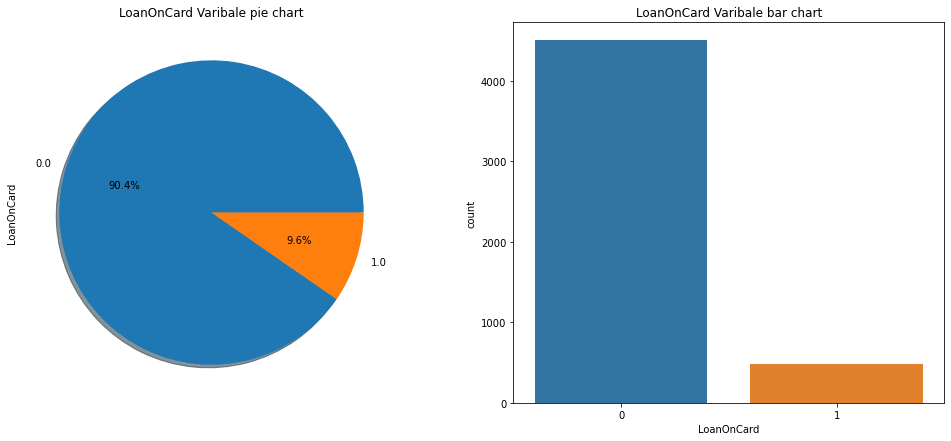

In [9]:
# Visulaisation of the Target variable

f, axes=plt.subplots(1,2, figsize=(17,7))
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
sns.countplot('LoanOnCard', data=data, ax=axes[1],order=[0,1])
axes[0].set_title("LoanOnCard Varibale pie chart")
axes[1].set_title('LoanOnCard Varibale bar chart');

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">B.Check the percentage of missing values and impute/drop if required. 

In [10]:
data.isnull().sum()*100/len(data)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

**We can see here 0.4% values in class "LoanOnCard" are missing. Since the % of missing values is negligible we opt to droping those values.**

In [11]:
data.dropna(axis=0, inplace=True)

In [12]:
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**All the missing values are removed.**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">C.Check for unexpected values in each categorical variable and impute with best suitable value.

In [13]:
data.HiddenScore.unique()


array([1, 4, 3, 2], dtype=object)

In [14]:
data.Level.unique()

array([3, 2, 1], dtype=object)

In [15]:
data.FixedDepositAccount.unique()

array([0, 1], dtype=object)

In [16]:
data.Security.unique()

array([0, 1], dtype=object)

In [17]:
data.InternetBanking.unique()

array([0, 1], dtype=object)

In [18]:
data.CreditCard.unique()

array([0, 1], dtype=object)

**There is no any unexpected values in the categorical variable**

### 3.Data Preparation and model building: 

In [19]:
# Droping 'ID' & 'ZipCode' varibales

data.drop(['ID', 'ZipCode'], axis=1, inplace=True)
data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [20]:
#Checking for correlations

data.corr()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.051896,-0.013272,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.049918,-0.011380,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,0.646109,0.207236,0.502626
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,1.000000,0.110275,0.366912
Mortgage,-0.013272,-0.011380,0.207236,0.110275,1.000000,0.141947
LoanOnCard,-0.008147,-0.007801,0.502626,0.366912,0.141947,1.000000


**From the above correlation table we can notice that independent variable 'Age' & 'CustomerSince' have negligible impact on Target variable. Therefore we will remove these 2 variables**

In [21]:
data.drop(['Age', 'CustomerSince'], axis=1, inplace=True)

In [22]:
data.head(3)

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,180,1,8.9,3,0,0,0,0,0,1.0
10,105,4,2.4,3,0,0,0,0,0,0.0
11,45,3,0.1,2,0,0,0,1,0,0.0


In [23]:
# Oulier treatment

col=['HighestSpend','HiddenScore','MonthlyAverageSpend']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(data[c],25),np.percentile(data[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = data.loc[(data[c] >= lower) & (data[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    data[c]=np.where(data[c]>upper,mean,data[c])
    data[c]=np.where(data[c]<lower,mean,data[c])
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in HiddenScore Before Imputing : 0


 Mean of HiddenScore is 2


 Total Number of outliers in HiddenScore After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0




**Now we have mputed all the outliers with mean value**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">A.Split data into X and Y. 

In [24]:
# Splitting the dataset into predictors and target

x=data.drop(columns='LoanOnCard')
y=data['LoanOnCard']

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">B.Split data into train and test. Keep 25% data reserved for testing. 

In [25]:
# Splitting the data into train and test sets in 75:25 ratio

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">C.Train a Supervised Learning Classification base model - Logistic Regression. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Buliding Logistic Regression Model

model_logit=LogisticRegression()
model_logit.fit(x_train, y_train)
y_pred=model_logit.predict(x_test)

C:\Users\vkgb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Here we have trained Logistic Regression model on the given dataset**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">D.Print evaluation metrics for the model and clearly share insights.

In [28]:
# Checking the accuracy of the model

print("Accuracy on training data:", model_logit.score(x_train, y_train))
print("Accuracy on test data:", model_logit.score(x_test, y_test))

Accuracy on training data: 0.9475234270414993
Accuracy on test data: 0.9502008032128514


**94.75% Accuracy on training data & 95.02% accuracy on Test data. Accuracy of training set and Testing set seems to be balanced**

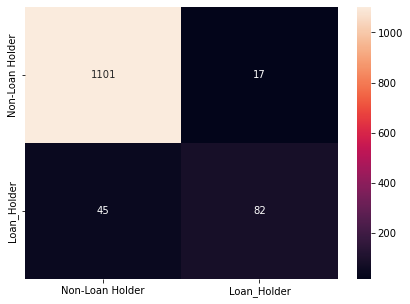

In [29]:
# Confusion Matrix

cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan Holder","Loan_Holder"]],
                  columns = [i for i in ["Non-Loan Holder","Loan_Holder"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


**17 & 45 are the errors in the model**

In [30]:
# Classification matrix

print("Classification Matrix:",classification_report(y_test, y_pred))

Classification Matrix:               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1118
         1.0       0.83      0.65      0.73       127

    accuracy                           0.95      1245
   macro avg       0.89      0.82      0.85      1245
weighted avg       0.95      0.95      0.95      1245



**Here we can notice that Model is poor in predicting class 1 as compared to class 0.**

**Accuracy is good but in this case recall is important**

**Here recall tells us that only 65% of values are predicted correctly from actual values. This need to be improved**

**We do not have enough samples of class 1 to train the model**

**Oversampling can resolve this issue**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">E.Balance the data using the right balancing technique.

C:\Users\vkgb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


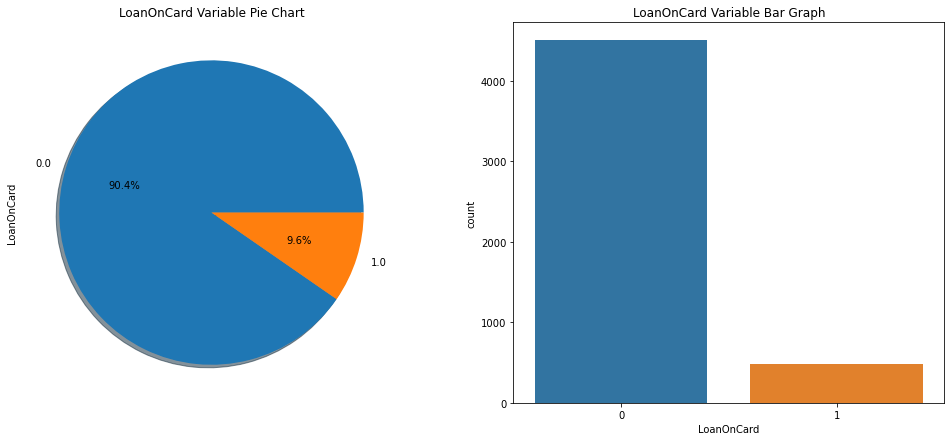

In [31]:
# Checking the distribution of the target variable

f,axes=plt.subplots(1,2,figsize=(17,7))
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=data,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

### There is huge imbalance inbetween target variable**

#### If this imbalance remain untreated, The algorithm receives significantly more examples from one class, prompting it to be biased towards that particular class. It does not learn what makes the other class “different” and fails to understand the underlying patterns that allow us to distinguish classes.

#### A widely adopted technique for dealing with highly unbalanced datasets is called resampling

#### Two widely used resampling methods:

#### Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

#### Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

#### Here we will use oversampling because undersampling may remove important information from the dataset

In [32]:
# Target imbalance: Treatment with SMOTE method

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE


smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(x,y)

In [33]:
print("Number of data points before sampling")
print(y.value_counts())

Number of data points before sampling
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [34]:
print("Number of data points after oversampling")
print(y_s.value_counts())

Number of data points after oversampling
1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64


**We can notice here, target is balnced after oversampling. Data is having 50:50 proportion**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">F.Again train the same previous model on balanced data. 

In [35]:
#Splitting the dataset into training and test data

x_train, x_test, y_train, y_test=train_test_split(x_s, y_s, test_size=0.25, random_state=1)

In [36]:
#Fitting the model

model_logit.fit(x_train, y_train)
y_pred1=model_logit.predict(x_test)

print("Accuracy on training dataset:", model_logit.score(x_train, y_train))
print("Accuracy in test dataset:", model_logit.score(x_test, y_test))

Accuracy on training dataset: 0.8902222222222222
Accuracy in test dataset: 0.884


C:\Users\vkgb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Now the accuracy on both the datset has considerably decreased.**

**Lets check for the accuracy**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">G.Print evaluation metrics and clearly share differences observed.

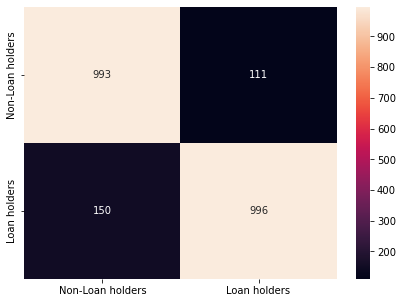

In [37]:
cm = confusion_matrix(y_test, y_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [38]:
print("Classififcation report: \n", classification_report(y_test, y_pred1))

Classififcation report: 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1104
         1.0       0.90      0.87      0.88      1146

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250



**Here we can see that recall, precision & F1 score value have improved after oversampling**

**Accuracy has decreased**

### 4.Performance Improvement: 

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">A.Train a base model each for SVM, KNN. 

In [39]:
# Building a SVM model

from sklearn.svm import SVC

#Building SVM on train data

svc_model=SVC(C=0.1, kernel='linear',gamma=1)
svc_model.fit(x_train, y_train)

y_pred_svm=svc_model.predict(x_test)

In [40]:
print("Accuracy on training data: \n", svc_model.score(x_train, y_train))
print("Accuracy on test data: \n", svc_model.score(x_test, y_test))

Accuracy on training data: 
 0.8921481481481481
Accuracy on test data: 
 0.8884444444444445


**Accuracy of the SVM model on Training and Test data is almost similar to the accuracy given by Logistic Regression model**

In [41]:
# Classififcation matrix

print("Classification Matrix: \n", classification_report(y_test, y_pred_svm))

Classification Matrix: 
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1104
         1.0       0.90      0.87      0.89      1146

    accuracy                           0.89      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.89      0.89      0.89      2250



In [42]:
# Building a KNN model

NNH=KNeighborsClassifier(n_neighbors=5)

NNH.fit(x_train, y_train)
y_pred_knn=NNH.predict(x_test)

In [43]:
# Accuracy score

print(" Accuracy on training data is", NNH.score(x_train, y_train))
print("Accuracy on test data is", NNH.score(x_test, y_test))

 Accuracy on training data is 0.9607407407407408
Accuracy on test data is 0.9377777777777778


In [44]:
print("Classification matrix: \n", classification_report(y_test, y_pred_knn))

Classification matrix: 
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      1104
         1.0       0.91      0.97      0.94      1146

    accuracy                           0.94      2250
   macro avg       0.94      0.94      0.94      2250
weighted avg       0.94      0.94      0.94      2250



In [45]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression()
logit.fit(x_train, y_train)

print("Accuracy on Train data is", logit.score(x_train, y_train))
print("Accuracy on test data is", logit.score(x_test, y_test))

Accuracy on Train data is 0.8902222222222222
Accuracy on test data is 0.884


C:\Users\vkgb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**From above results it can be inferred that KNN model is giving best accuracy amongst all**

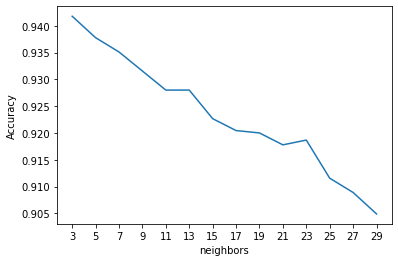

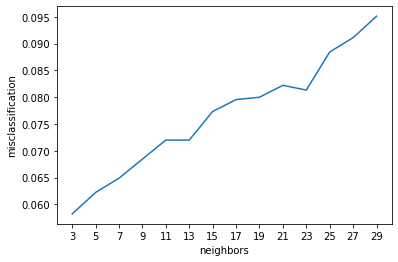

In [46]:
# Now finding the best K value

N_neigbours = list(np.arange(3,30,2))
score = []
misclassification = []
for n in N_neigbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train.values.ravel())
    sc = knn.score(x_test, y_test);
    score.append(sc)
    misclassification.append(1-sc)
plt.plot(N_neigbours, score);
plt.xticks(N_neigbours);
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.show()
plt.plot(N_neigbours, misclassification);
plt.xticks(N_neigbours);
plt.xlabel("neighbors")
plt.ylabel("misclassification")
plt.show()

**From the above plots we can see that, k=3 is the best value for KNN model.**

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">C.Print evaluation metrics for final model.

In [47]:
NNH=KNeighborsClassifier(n_neighbors=3)

NNH.fit(x_train, y_train)
y_pred_knn=NNH.predict(x_test)


print(" Accuracy on training data is", NNH.score(x_train, y_train))
print("Accuracy on test data is", NNH.score(x_test, y_test))

print("Classification matrix: \n", classification_report(y_test, y_pred_knn))

 Accuracy on training data is 0.9724444444444444
Accuracy on test data is 0.9417777777777778
Classification matrix: 
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1104
         1.0       0.92      0.97      0.94      1146

    accuracy                           0.94      2250
   macro avg       0.94      0.94      0.94      2250
weighted avg       0.94      0.94      0.94      2250



**With accuracy of 94% this will be our final model**

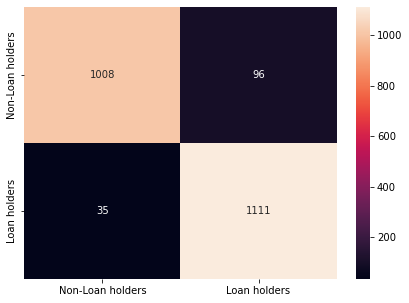

In [48]:
cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">D.Share improvement achieved from base model to final model.

#### Accuracy on training data set increased from 89.02% in earlier model to 97.24% in this model.

#### Accuarcy on Test data set shown considerable improvemnet from 88.40% to 94.17%.

#### F1 score has shown improvement from 0.88 to 0.94.

#### Misclassification cases were reduced from 111 & 150 to 96 & 35 respectively.